**Project**

How do rising sea levels correlate with global average temperatures across different years?

Can we accurately predict future temperatures prices based on historical temperature, sea level, and carbon emmission data.

In [1]:
import kagglehub

path = kagglehub.dataset_download("palinatx/mean-temperature-for-countries-by-year-2014-2022")
path1 = kagglehub.dataset_download("kkhandekar/global-sea-level-1993-2021")
print(path)

!cd /root/.cache/kagglehub/datasets/berkeleyearth/climate-change-earth-surface-temperature-data/versions/2
!ls /root/.cache/kagglehub/datasets/palinatx/mean-temperature-for-countries-by-year-2014-2022/versions/3/combined_temperature.csv


100%|██████████| 127k/127k [00:00<00:00, 427kB/s]

Extracting files...


100%|██████████| 22.2k/22.2k [00:00<00:00, 11.3MB/s]

Extracting files...
/root/.cache/kagglehub/datasets/palinatx/mean-temperature-for-countries-by-year-2014-2022/versions/3
/bin/bash: line 1: cd: /root/.cache/kagglehub/datasets/berkeleyearth/climate-change-earth-surface-temperature-data/versions/2: No such file or directory


/root/.cache/kagglehub/datasets/palinatx/mean-temperature-for-countries-by-year-2014-2022/versions/3/combined_temperature.csv


Extract a specific country: Italy

,Country,Year,Annual Mean,5-yr smooth,Code
0,Dominican Republic,1901,23.71,23.65,DOM
1,Dominican Republic,1902,23.40,23.52,DOM
2,Dominican Republic,1903,23.45,23.38,DOM
3,Dominican Republic,1904,23.03,23.26,DOM
4,Dominican Republic,1905,23.44,23.16,DOM
...,...,...,...,...,...
105,Dominican Republic,2006,24.57,24.37,DOM
106,Dominican Republic,2007,24.33,24.31,DOM
107,Dominican Republic,2008,23.95,24.26,DOM
108,Dominican Republic,2009,24.31,24.24,DOM


,Year,Annual Mean,5-yr smooth
0,1901,18.705471,18.665824
1,1902,18.531000,18.614176
2,1903,18.580118,18.565118
3,1904,18.487647,18.523824
4,1905,18.555000,18.493471
5,1906,18.639294,18.477294
6,1907,18.343176,18.478647
7,1908,18.465000,18.493941
8,1909,18.518529,18.519118
9,1910,18.551588,18.547059


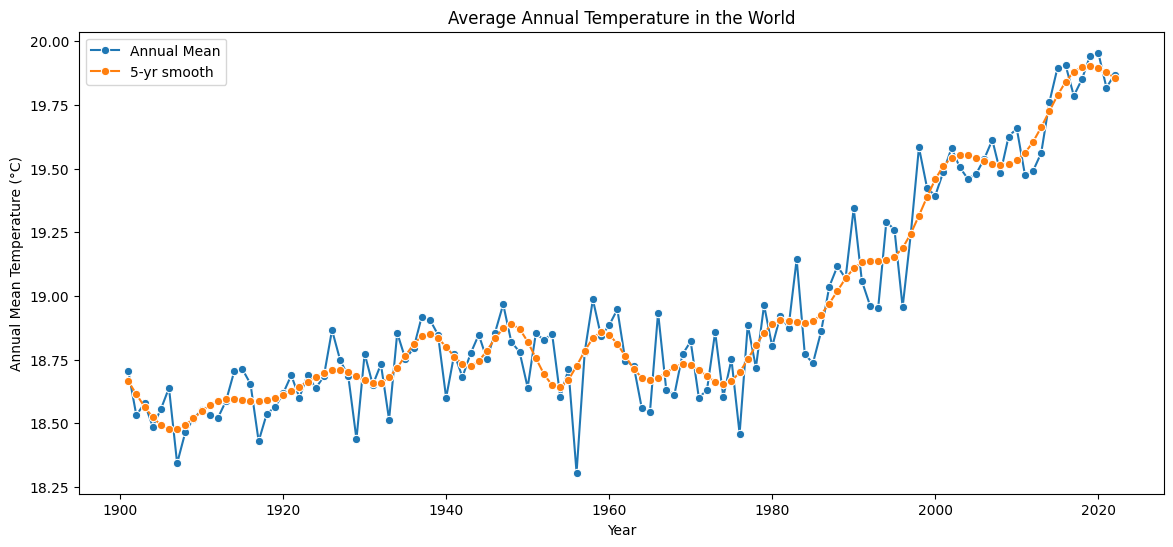

,Country,Year,Annual Mean,5-yr smooth,Code
19642,Italy,1901,11.53,11.78,ITA
19643,Italy,1902,11.77,11.77,ITA
19644,Italy,1903,11.83,11.75,ITA
19645,Italy,1904,12.28,11.74,ITA
19646,Italy,1905,11.67,11.73,ITA
19647,Italy,1906,11.68,11.73,ITA
19648,Italy,1907,11.71,11.73,ITA
19649,Italy,1908,11.47,11.74,ITA
19650,Italy,1909,11.40,11.76,ITA
19651,Italy,1910,11.76,11.77,ITA


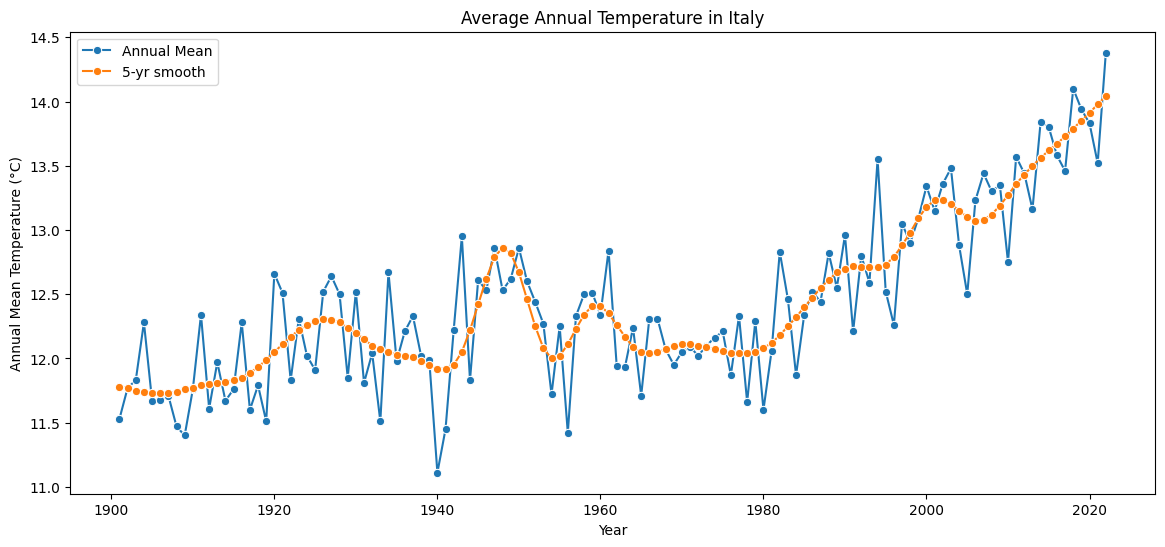

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt

countryTemp = pd.read_csv('/root/.cache/kagglehub/datasets/palinatx/mean-temperature-for-countries-by-year-2014-2022/versions/3/combined_temperature.csv')
countryTemp = pd.DataFrame(countryTemp)
display(countryTemp.head(110))

#Average World Temperature
worldDF = countryTemp.groupby('Year').agg({'Annual Mean': 'mean', '5-yr smooth': 'mean'}).reset_index()
display(worldDF.head(10))
plt.figure(figsize=(14, 6))
sns.lineplot(data=worldDF, x='Year', y='Annual Mean', marker='o', label='Annual Mean')
sns.lineplot(data=worldDF, x='Year', y='5-yr smooth', marker='o', label='5-yr smooth')
plt.title(f'Average Annual Temperature in the World')
plt.ylabel('Annual Mean Temperature (°C)')
plt.xlabel('Year')
plt.legend()
plt.show()


#Italy Temperature
italyDF = countryTemp[countryTemp['Country'] == 'Italy']
display(italyDF.head(10))
plt.figure(figsize=(14, 6))
sns.lineplot(data=italyDF, x='Year', y='Annual Mean', marker='o', label='Annual Mean')
sns.lineplot(data=italyDF, x='Year', y='5-yr smooth', marker='o', label='5-yr smooth')
plt.title(f'Average Annual Temperature in Italy')
plt.ylabel('Annual Mean Temperature (°C)')
plt.xlabel('Year')
plt.legend()
plt.show()

,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0
5,Afghanistan,AFG,1954,106256.0
6,Afghanistan,AFG,1955,153888.0
7,Afghanistan,AFG,1956,183200.0
8,Afghanistan,AFG,1957,293120.0
9,Afghanistan,AFG,1958,329760.0


Index(['Entity', 'Code', 'Year', 'Annual CO₂ emissions'], dtype='object')

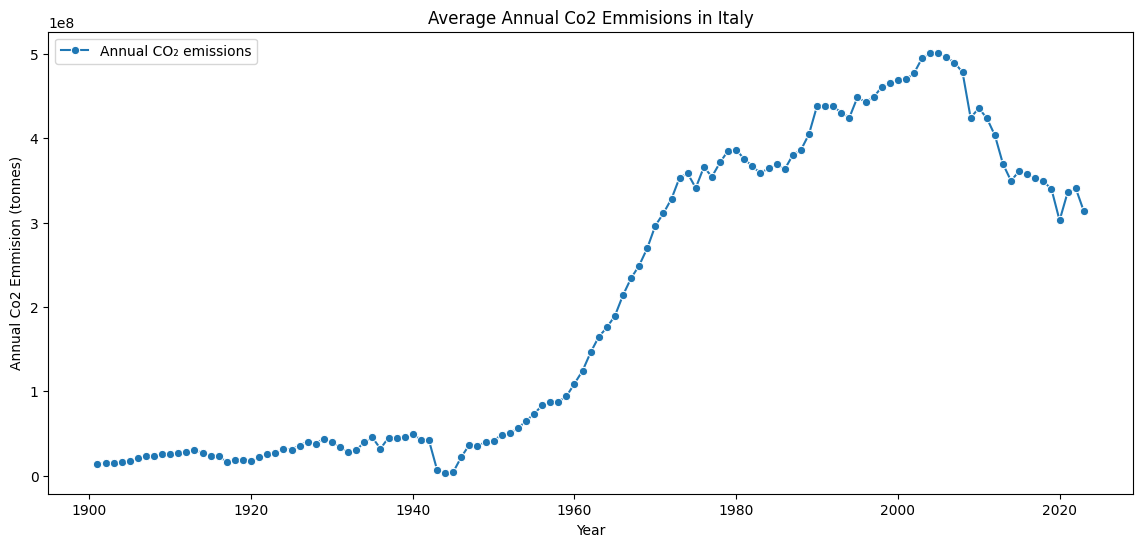

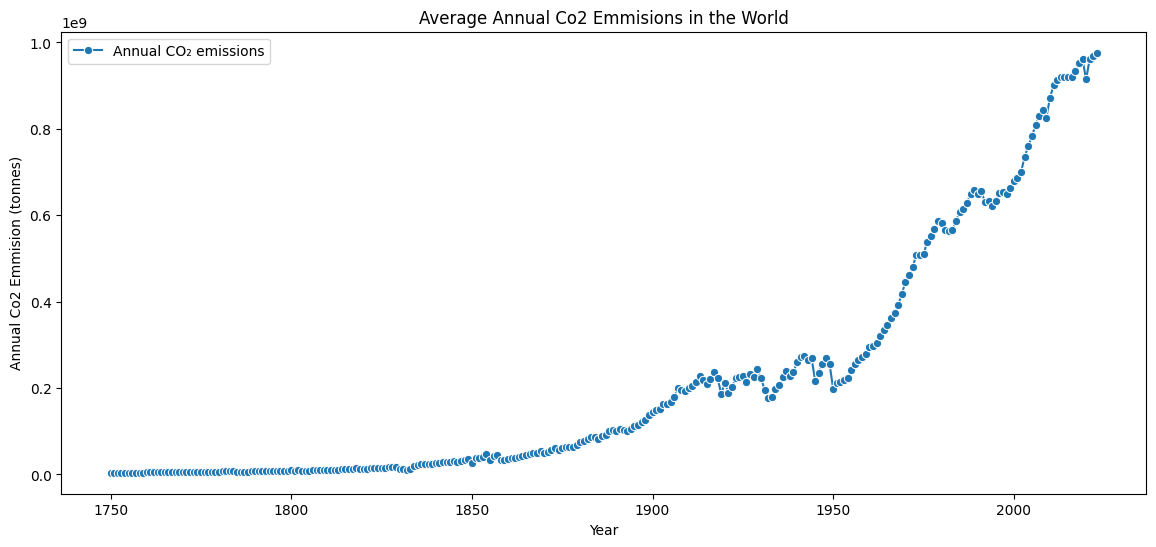

In [8]:
import os

co2emmision = pd.read_csv('annual-co2-emissions-per-country.csv')
co2emmision = pd.DataFrame(co2emmision)
display(co2emmision.head(10))

display(co2emmision.columns)

#Get data for italy, make sure years mach up
italyco2 = co2emmision[co2emmision['Entity'] == 'Italy']
italyco2 = italyco2[italyco2['Year'] >= 1901]
italyco2
#Italy co2Emmisions
plt.figure(figsize=(14, 6))
sns.lineplot(data=italyco2, x='Year', y='Annual CO₂ emissions', marker='o', label='Annual CO₂ emissions')
plt.title(f'Average Annual Co2 Emmisions in Italy')
plt.ylabel('Annual Co2 Emmision (tonnes)')
plt.xlabel('Year')
plt.legend()
plt.show()


#Get data for world, make sure years mach up
worldco2 = co2emmision.groupby('Year').agg({'Annual CO₂ emissions': 'mean'}).reset_index()
#World co2Emmisions
plt.figure(figsize=(14, 6))
sns.lineplot(data=worldco2, x='Year', y='Annual CO₂ emissions', marker='o', label='Annual CO₂ emissions')
plt.title(f'Average Annual Co2 Emmisions in the World')
plt.ylabel('Annual Co2 Emmision (tonnes)')
plt.xlabel('Year')
plt.legend()
plt.show()


,Country,Year,Annual Mean,5-yr smooth,Code,Entity,Annual CO₂ emissions
0,Italy,1901,11.53,11.78,ITA,Italy,13520160.0
1,Italy,1902,11.77,11.77,ITA,Italy,15015072.0
2,Italy,1903,11.83,11.75,ITA,Italy,15315520.0
3,Italy,1904,12.28,11.74,ITA,Italy,16187551.0
4,Italy,1905,11.67,11.73,ITA,Italy,17843680.0
5,Italy,1906,11.68,11.73,ITA,Italy,21089984.0
6,Italy,1907,11.71,11.73,ITA,Italy,22808400.0
7,Italy,1908,11.47,11.74,ITA,Italy,23262736.0
8,Italy,1909,11.40,11.76,ITA,Italy,25702960.0
9,Italy,1910,11.76,11.77,ITA,Italy,25735936.0


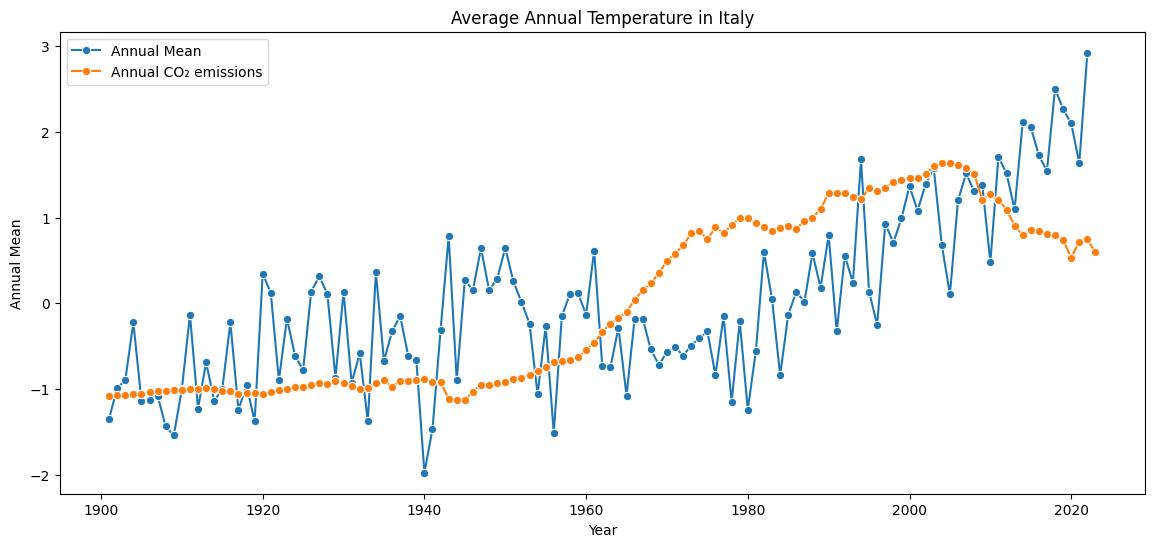

,Year,Annual Mean,5-yr smooth,Annual CO₂ emissions
0,1901,18.705471,18.665824,1.489848e+08
1,1902,18.531000,18.614176,1.521439e+08
2,1903,18.580118,18.565118,1.630048e+08
3,1904,18.487647,18.523824,1.634754e+08
4,1905,18.555000,18.493471,1.681852e+08
5,1906,18.639294,18.477294,1.787954e+08
6,1907,18.343176,18.478647,2.009740e+08
7,1908,18.465000,18.493941,1.947404e+08
8,1909,18.518529,18.519118,1.939645e+08
9,1910,18.551588,18.547059,2.005713e+08


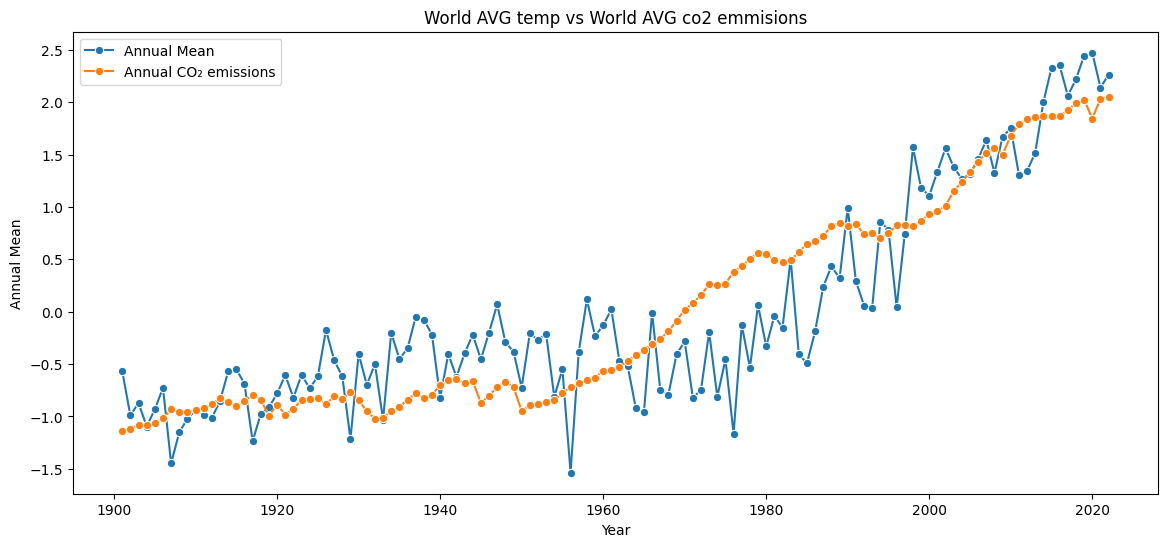

In [11]:
#ITALY DATA
#Create merged table
italyMerged = italyDF.merge(italyco2, how='outer')
display(italyMerged.head(10))

#Normalize data (z-score)
italyMerged['Annual Mean'] = (italyMerged['Annual Mean'] - italyMerged['Annual Mean'].mean()) / italyMerged['Annual Mean'].std()
italyMerged['Annual CO₂ emissions'] = (italyMerged['Annual CO₂ emissions'] - italyMerged['Annual CO₂ emissions'].mean()) / italyMerged['Annual CO₂ emissions'].std()

#plotting of graph
plt.figure(figsize=(14, 6))
sns.lineplot(data=italyMerged, x='Year', y='Annual Mean', marker='o', label='Annual Mean')
sns.lineplot(data=italyMerged, x='Year', y='Annual CO₂ emissions', marker='o', label='Annual CO₂ emissions')
plt.title(f'Average Annual Temperature in Italy')
plt.ylabel('Annual Mean')
plt.xlabel('Year')
plt.legend()
plt.show()



#WORLD DATA
#Create world merged table
worldMerged = worldDF.merge(worldco2, on='Year')
display(worldMerged.head(10))

#Normalize data (z-score)
worldMerged['Annual Mean'] = (worldMerged['Annual Mean'] - worldMerged['Annual Mean'].mean()) / worldMerged['Annual Mean'].std()
worldMerged['Annual CO₂ emissions'] = (worldMerged['Annual CO₂ emissions'] - worldMerged['Annual CO₂ emissions'].mean()) / worldMerged['Annual CO₂ emissions'].std()

#plotting of graph
plt.figure(figsize=(14, 6))
sns.lineplot(data=worldMerged, x='Year', y='Annual Mean', marker='o', label='Annual Mean')
sns.lineplot(data=worldMerged, x='Year', y='Annual CO₂ emissions', marker='o', label='Annual CO₂ emissions')
plt.title(f'World AVG temp vs World AVG co2 emmisions')
plt.ylabel('Annual Mean')
plt.xlabel('Year')
plt.legend()

plt.show()

,Year,Annual Mean,5-yr smooth,Annual CO₂ emissions
120,2021,19.818059,19.877353,9.621958e+08
121,2022,19.868235,19.856471,9.674599e+08


,Year,Annual Mean,5-yr smooth,Annual CO₂ emissions
0,1901,18.705471,18.665824,1.489848e+08
1,1902,18.531000,18.614176,1.521439e+08
2,1903,18.580118,18.565118,1.630048e+08
3,1904,18.487647,18.523824,1.634754e+08
4,1905,18.555000,18.493471,1.681852e+08
5,1906,18.639294,18.477294,1.787954e+08
6,1907,18.343176,18.478647,2.009740e+08
7,1908,18.465000,18.493941,1.947404e+08
8,1909,18.518529,18.519118,1.939645e+08
9,1910,18.551588,18.547059,2.005713e+08


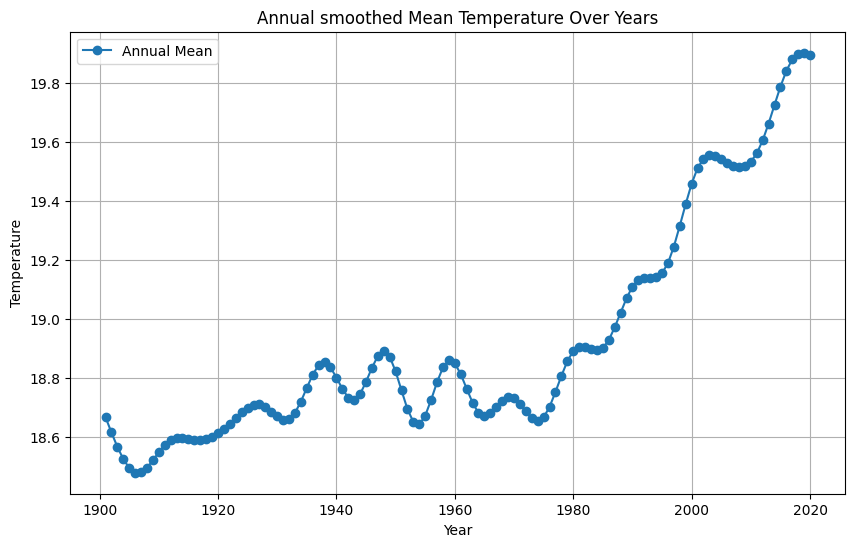

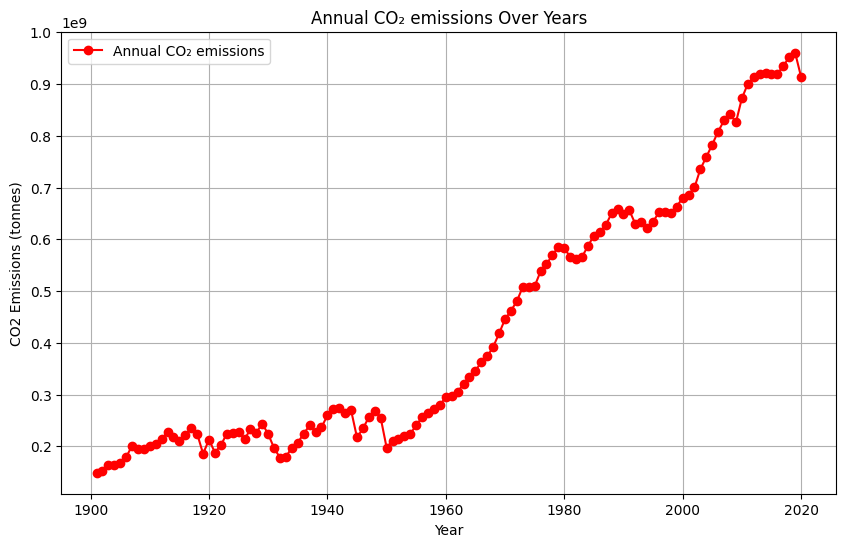


Correlation matrix:
                          Year  Annual Mean  5-yr smooth  Annual CO₂ emissions
Year                  1.000000     0.821830     0.857502              0.938677
Annual Mean           0.821830     1.000000     0.958865              0.867414
5-yr smooth           0.857502     0.958865     1.000000              0.907410
Annual CO₂ emissions  0.938677     0.867414     0.907410              1.000000


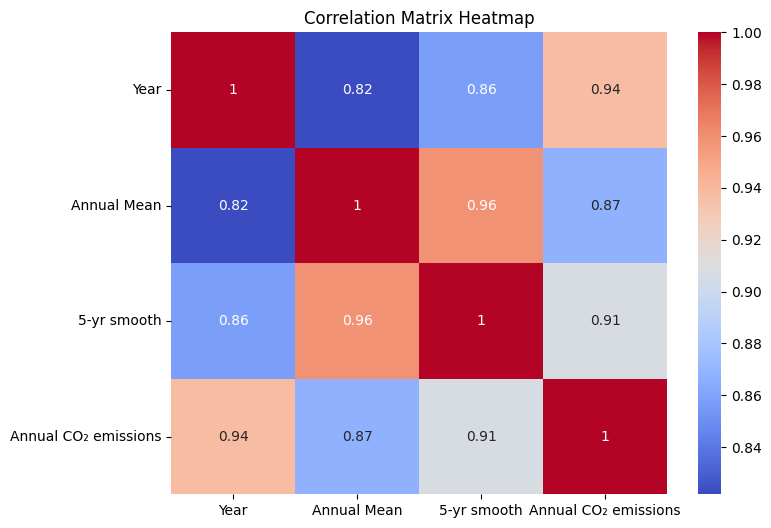


Predicted Annual Mean Temperature for 2021: 19.878867244793064

Mean Squared Error on test set: 0.017307374926318272


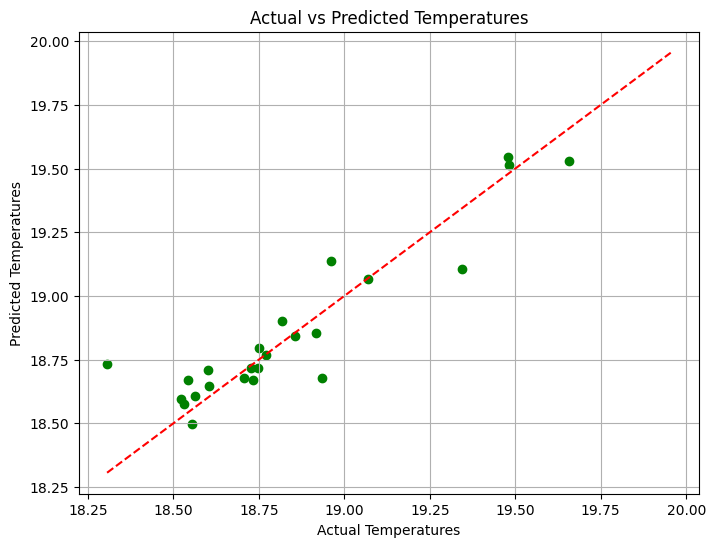

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

#Load and Preprocess Data
moredata = worldMerged[worldMerged['Year'] > 2020].copy()
data = worldMerged[worldMerged['Year'] <= 2020].copy()

display(moredata.head(10))
display(worldMerged.head(10))

#EDA, plot Annual Mean Temperature over Years
plt.figure(figsize=(10,6))
plt.plot(data['Year'], data['5-yr smooth'], marker='o', label='Annual Mean')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Annual smoothed Mean Temperature Over Years')
plt.legend()
plt.grid(True)
plt.show()

#Plot Annual CO2 emissions over years
plt.figure(figsize=(10,6))
plt.plot(data['Year'], data['Annual CO₂ emissions'], marker='o', color='red', label='Annual CO₂ emissions')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (tonnes)')
plt.title('Annual CO₂ emissions Over Years')
plt.legend()
plt.grid(True)
plt.show()

#correlations
corr_matrix = data.corr()
print("\nCorrelation matrix:")
print(corr_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Define features and target
X = data[['5-yr smooth', 'Annual CO₂ emissions']]
y = data['Annual Mean']

#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#train the Model
model = LinearRegression()
model.fit(X_train, y_train)

#add value to predict
X_2021 = pd.DataFrame({
    '5-yr smooth': 19.877353,
    'Annual CO₂ emissions': [9.621958e+08]
})


temperature_2021 = model.predict(X_2021)
print(f"\nPredicted Annual Mean Temperature for 2021: {temperature_2021[0]}")

#Evaluate the Model
y_pred = model.predict(X_test)

#calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error on test set: {mse}")

#Plot Actual vs Predicted Temperatures
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Temperatures')
plt.ylabel('Predicted Temperatures')
plt.title('Actual vs Predicted Temperatures')
plt.grid(True)
plt.show()


,Year,TotalWeightedObservations,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved
0,1993,327401.31,-38.59,89.86,-38.76,-38.59,89.86,-38.75,-38.57
1,1993,324498.41,-41.97,90.86,-39.78,-41.97,90.86,-39.77,-39.11
2,1993,333018.19,-41.93,87.27,-39.62,-41.91,87.27,-39.61,-38.58


,Year,Annual Mean,5-yr smooth,Annual CO₂ emissions,Global Mean Sea Level
0,1993,18.953412,19.139118,2.344926e+10,-1280.40
1,1994,19.291647,19.141176,2.299379e+10,-1145.19
2,1995,19.259765,19.154412,2.346172e+10,-1059.90
3,1996,18.956176,19.188176,2.347027e+10,-957.47
4,1997,19.243412,19.244706,2.418676e+10,-839.25
5,1998,19.583118,19.315235,2.405249e+10,-927.24
6,1999,19.423412,19.389176,2.454113e+10,-807.06
7,2000,19.393471,19.457824,2.516751e+10,-681.74
8,2001,19.488353,19.511059,2.540076e+10,-489.11
9,2002,19.580235,19.542118,2.521088e+10,-337.42


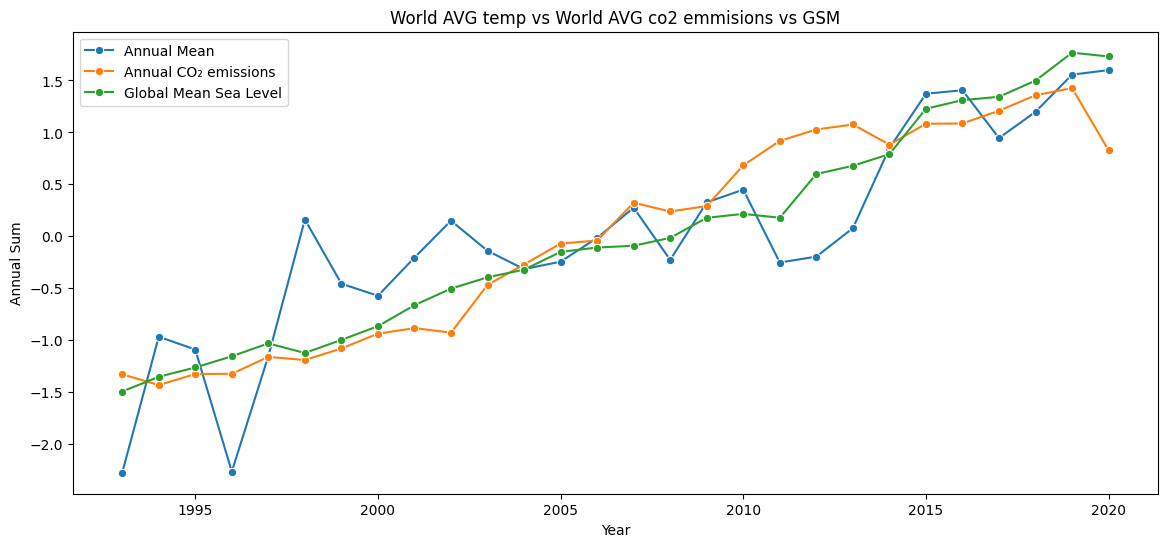

In [21]:
import kagglehub
sealevel_data = pd.read_csv('/root/.cache/kagglehub/datasets/kkhandekar/global-sea-level-1993-2021/versions/2/sealevel.csv')

display(sealevel_data.head(3))

del sealevel_data['StdDevGMSL_noGIA']
del sealevel_data['SmoothedGSML_noGIA']
del sealevel_data['GMSL_GIA']
del sealevel_data['StdDevGMSL_GIA']
del sealevel_data['TotalWeightedObservations']
del sealevel_data['SmoothedGSML_GIA']
del sealevel_data['SmoothedGSML_GIA_sigremoved']

sealevel_data = sealevel_data.rename(columns={
    'GMSL_noGIA': 'Global Mean Sea Level',
    'Year': 'Year'
})
worldMerged = worldDF.merge(worldco2, on='Year')

finalDF = worldMerged.merge(sealevel_data, on='Year')

finalDF = finalDF.groupby('Year').agg({'Annual Mean': 'mean', '5-yr smooth': 'mean', 'Annual CO₂ emissions': 'sum', 'Global Mean Sea Level': 'sum'}).reset_index()
finalDF = finalDF[finalDF['Year'] < 2021]

display(finalDF.head(100))

finalDF = finalDF[finalDF['Year'] >= 1993]

#Normalize data (z-score)
finalDF['Annual Mean'] = (finalDF['Annual Mean'] - finalDF['Annual Mean'].mean()) / finalDF['Annual Mean'].std()
finalDF['Annual CO₂ emissions'] = (finalDF['Annual CO₂ emissions'] - finalDF['Annual CO₂ emissions'].mean()) / finalDF['Annual CO₂ emissions'].std()
finalDF['Global Mean Sea Level'] = (finalDF['Global Mean Sea Level'] - finalDF['Global Mean Sea Level'].mean()) / finalDF['Global Mean Sea Level'].std()

#plotting of graph
plt.figure(figsize=(14, 6))
sns.lineplot(data=finalDF, x='Year', y='Annual Mean', marker='o', label='Annual Mean')
sns.lineplot(data=finalDF, x='Year', y='Annual CO₂ emissions', marker='o', label='Annual CO₂ emissions')
sns.lineplot(data=finalDF, x='Year', y='Global Mean Sea Level', marker='o', label='Global Mean Sea Level')
plt.title(f'World AVG temp vs World AVG co2 emmisions vs GSM')
plt.ylabel('Annual Sum')
plt.xlabel('Year')
plt.legend()

,Year,Annual Mean,5-yr smooth,Annual CO₂ emissions
0,1901,18.705471,18.665824,1.489848e+08
1,1902,18.531000,18.614176,1.521439e+08
2,1903,18.580118,18.565118,1.630048e+08
3,1904,18.487647,18.523824,1.634754e+08
4,1905,18.555000,18.493471,1.681852e+08
...,...,...,...,...
117,2018,19.851000,19.898941,9.524585e+08
118,2019,19.943353,19.902412,9.606857e+08
119,2020,19.954706,19.893412,9.142331e+08
120,2021,19.818059,19.877353,9.621958e+08


    Year  Annual Mean  5-yr smooth  Global Mean Sea Level
28  2021    19.818059    19.877353                 900.56
Year                       int64
Annual Mean              float64
5-yr smooth              float64
Global Mean Sea Level    float64
dtype: object


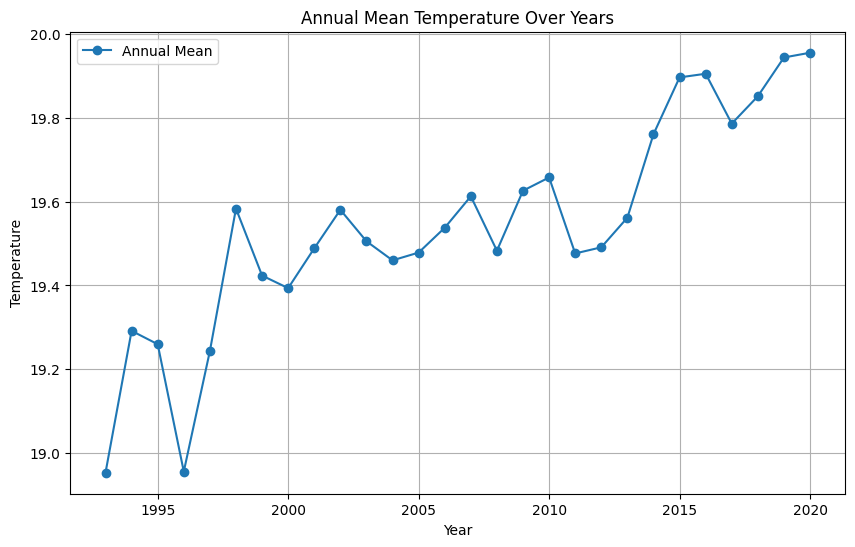

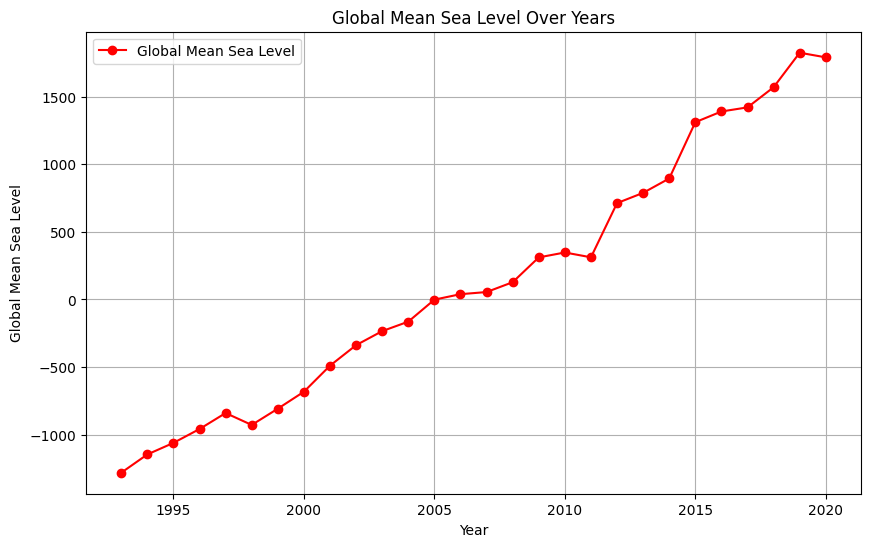


Correlation matrix:
                           Year  Annual Mean  5-yr smooth  \
Year                   1.000000     0.876042     0.954491   
Annual Mean            0.876042     1.000000     0.907853   
5-yr smooth            0.954491     0.907853     1.000000   
Global Mean Sea Level  0.989610     0.878482     0.958030   

                       Global Mean Sea Level  
Year                                0.989610  
Annual Mean                         0.878482  
5-yr smooth                         0.958030  
Global Mean Sea Level               1.000000  


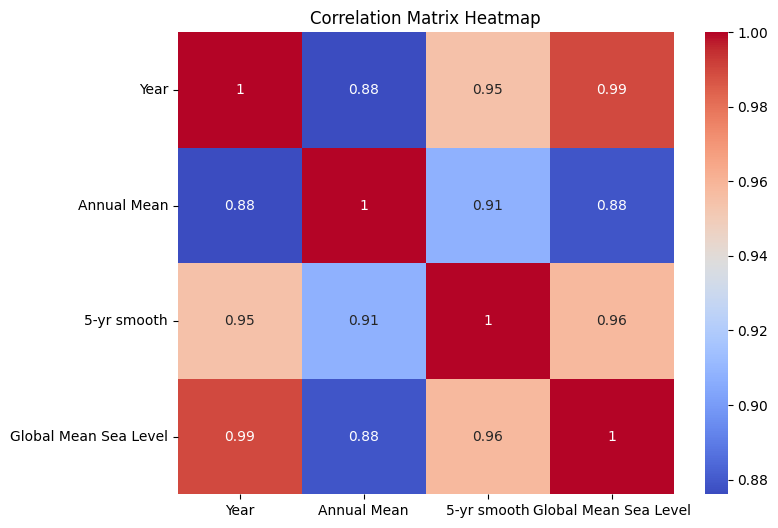


Predicted Annual Mean Temperature for 2021: 19.844129187036714

Mean Squared Error on test set: 0.010020260007875393


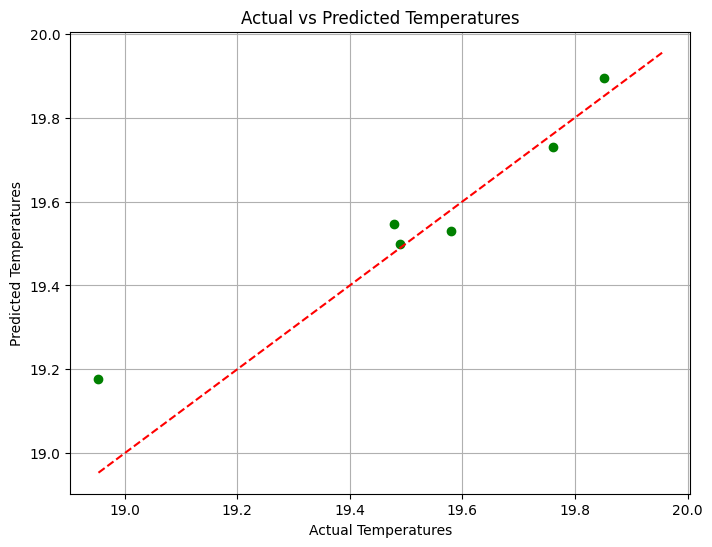

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np


#load
finalDF = worldDF.merge(sealevel_data, on='Year')
finalDF = finalDF.groupby('Year').agg({'Annual Mean': 'mean', '5-yr smooth': 'mean', 'Global Mean Sea Level': 'sum'}).reset_index()

display(worldMerged)

moredata = finalDF[finalDF['Year'] > 2020].copy()
data = finalDF[finalDF['Year'] <= 2020].copy()

print(moredata.head())
print(data.dtypes)

#EDA
plt.figure(figsize=(10,6))
plt.plot(data['Year'], data['Annual Mean'], marker='o', label='Annual Mean')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Annual Mean Temperature Over Years')
plt.legend()
plt.grid(True)
plt.show()

#Plot Annual Global sea level
plt.figure(figsize=(10,6))
plt.plot(data['Year'], data['Global Mean Sea Level'], marker='o', color='red', label='Global Mean Sea Level')
plt.xlabel('Year')
plt.ylabel('Global Mean Sea Level')
plt.title('Global Mean Sea Level Over Years')
plt.legend()
plt.grid(True)
plt.show()

corr_matrix = data.corr()
print("\nCorrelation matrix:")
print(corr_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

X = data[['5-yr smooth', 'Global Mean Sea Level']]
y = data['Annual Mean']

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#train the Model
model = LinearRegression()
model.fit(X_train, y_train)


X_2021 = pd.DataFrame({
    '5-yr smooth': [19.877353],
    'Global Mean Sea Level': [900.56]
})

temperature_2021 = model.predict(X_2021)
print(f"\nPredicted Annual Mean Temperature for 2021: {temperature_2021[0]}")

#Eval
y_pred = model.predict(X_test)

#calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error on test set: {mse}")

#Plot Actual vs Predicted Temperatures
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line for perfect prediction
plt.xlabel('Actual Temperatures')
plt.ylabel('Predicted Temperatures')
plt.title('Actual vs Predicted Temperatures')
plt.grid(True)
plt.show()


,Year,Annual Mean,5-yr smooth,Annual CO₂ emissions,Global Mean Sea Level
0,1993,18.953412,19.139118,6.337637e+08,-1280.40
1,1994,19.291647,19.141176,6.214538e+08,-1145.19
2,1995,19.259765,19.154412,6.341004e+08,-1059.90
3,1996,18.956176,19.188176,6.519520e+08,-957.47
4,1997,19.243412,19.244706,6.536962e+08,-839.25
5,1998,19.583118,19.315235,6.500674e+08,-927.24
6,1999,19.423412,19.389176,6.632737e+08,-807.06
7,2000,19.393471,19.457824,6.802029e+08,-681.74
8,2001,19.488353,19.511059,6.865069e+08,-489.11
9,2002,19.580235,19.542118,7.003022e+08,-337.42


    Year  Annual Mean  5-yr smooth  Annual CO₂ emissions  \
28  2021    19.818059    19.877353          9.621958e+08   

    Global Mean Sea Level  
28                 900.56  
Year                       int64
Annual Mean              float64
5-yr smooth              float64
Annual CO₂ emissions     float64
Global Mean Sea Level    float64
dtype: object

Correlation matrix:
                           Year  Annual Mean  5-yr smooth  \
Year                   1.000000     0.876042     0.954491   
Annual Mean            0.876042     1.000000     0.907853   
5-yr smooth            0.954491     0.907853     1.000000   
Annual CO₂ emissions   0.976563     0.794283     0.894109   
Global Mean Sea Level  0.989610     0.878482     0.958030   

                       Annual CO₂ emissions  Global Mean Sea Level  
Year                               0.976563               0.989610  
Annual Mean                        0.794283               0.878482  
5-yr smooth                        0.894109      

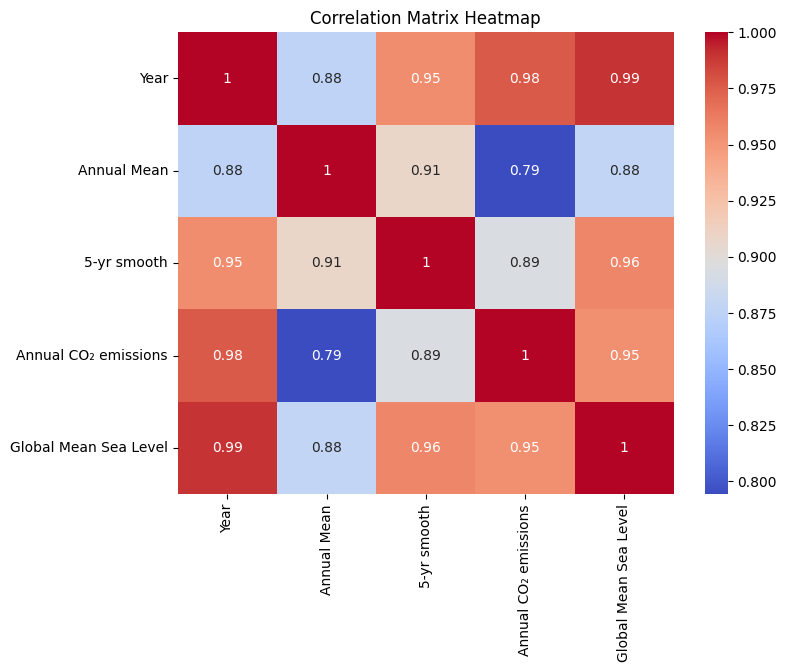


Predicted Annual Mean Temperature for 2021: 19.778108900614267

Mean Squared Error on test set: 0.010330506620598324


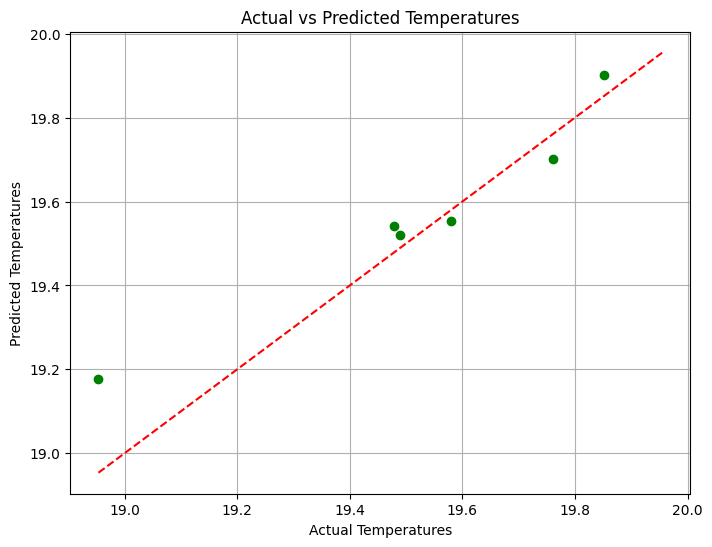

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

sealevel_data = pd.read_csv('/root/.cache/kagglehub/datasets/kkhandekar/global-sea-level-1993-2021/versions/2/sealevel.csv')
worldMerged = worldDF.merge(worldco2, on='Year')

del sealevel_data['StdDevGMSL_noGIA']
del sealevel_data['SmoothedGSML_noGIA']
del sealevel_data['GMSL_GIA']
del sealevel_data['StdDevGMSL_GIA']
del sealevel_data['TotalWeightedObservations']
del sealevel_data['SmoothedGSML_GIA']
del sealevel_data['SmoothedGSML_GIA_sigremoved']

sealevel_data = sealevel_data.rename(columns={
    'GMSL_noGIA': 'Global Mean Sea Level',
    'Year': 'Year'
})

finalDF = worldMerged.merge(sealevel_data, on='Year')

finalDF = finalDF.groupby('Year').agg({'Annual Mean': 'mean', '5-yr smooth': 'mean', 'Annual CO₂ emissions': 'mean', 'Global Mean Sea Level': 'sum'}).reset_index()
display(finalDF)

moredata = finalDF[finalDF['Year'] > 2020].copy()
data = finalDF[finalDF['Year'] <= 2020].copy()

print(moredata.head())
print(data.dtypes)

corr_matrix = data.corr()
print("\nCorrelation matrix:")
print(corr_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

X = data[['5-yr smooth', 'Global Mean Sea Level', 'Annual CO₂ emissions']]
y = data['Annual Mean']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

X_2021 = pd.DataFrame({
    '5-yr smooth': [19.877353],
    'Global Mean Sea Level': [900.56],
    'Annual CO₂ emissions': [9.621958e+08]

})

temperature_2021 = model.predict(X_2021)
print(f"\nPredicted Annual Mean Temperature for 2021: {temperature_2021[0]}")

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error on test set: {mse}")

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Temperatures')
plt.ylabel('Predicted Temperatures')
plt.title('Actual vs Predicted Temperatures')
plt.grid(True)
plt.show()
